# AirFly Insights — Week 3: Univariate & Bivariate Visual Analysis

**Dataset:** NYC Flights 2013 — preprocessed (`flights_processed.csv`)

**Goals for Week 3:**
- Top airlines, routes, and busiest months
- Flight distribution by day, time, and airport
- Delay trend analysis
- Bar charts, histograms, boxplots, and scatter plots

## 1. Imports & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Plot style
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['font.size'] = 12
sns.set_palette('tab10')

print('Setup complete.')

Setup complete.


## 2. Load Preprocessed Data

In [2]:
df = pd.read_csv('../data/processed/flights_processed.csv', low_memory=False)

# Parse datetime
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

# Working subset: non-cancelled flights only (for delay/speed analysis)
df_completed = df[df['is_cancelled'] == 0].copy()

print(f'Total rows: {len(df):,}')
print(f'Completed flights: {len(df_completed):,}')
print(f'Columns: {df.shape[1]}')

Total rows: 336,776
Completed flights: 328,521
Columns: 34


---
## Chart 1: Top 10 Airlines by Flight Count

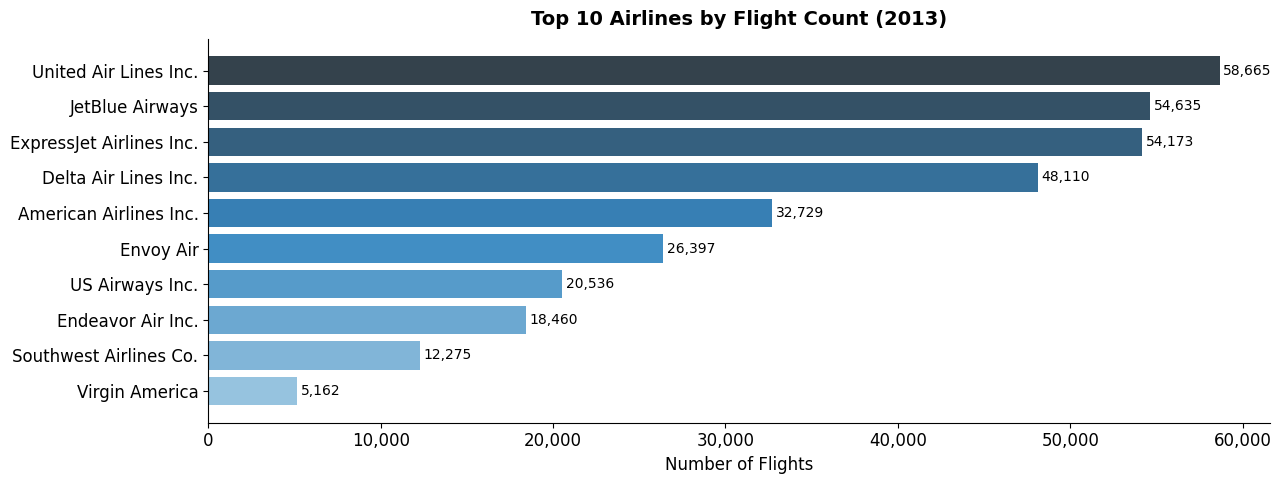

Chart 1 saved.


In [3]:
top_carriers = df.groupby('name').size().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(13, 5))
bars = ax.barh(top_carriers.index[::-1], top_carriers.values[::-1], color=sns.color_palette('Blues_d', 10))
ax.set_xlabel('Number of Flights')
ax.set_title('Top 10 Airlines by Flight Count (2013)', fontsize=14, fontweight='bold', pad=10)

# Add value labels
for bar, val in zip(bars, top_carriers.values[::-1]):
    ax.text(bar.get_width() + 200, bar.get_y() + bar.get_height()/2,
            f'{val:,}', va='center', fontsize=10)

ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.savefig('../outputs/figures/chart1_top_airlines.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 1 saved.')

---
## Chart 2: Flights Per Month (Seasonal Trend)

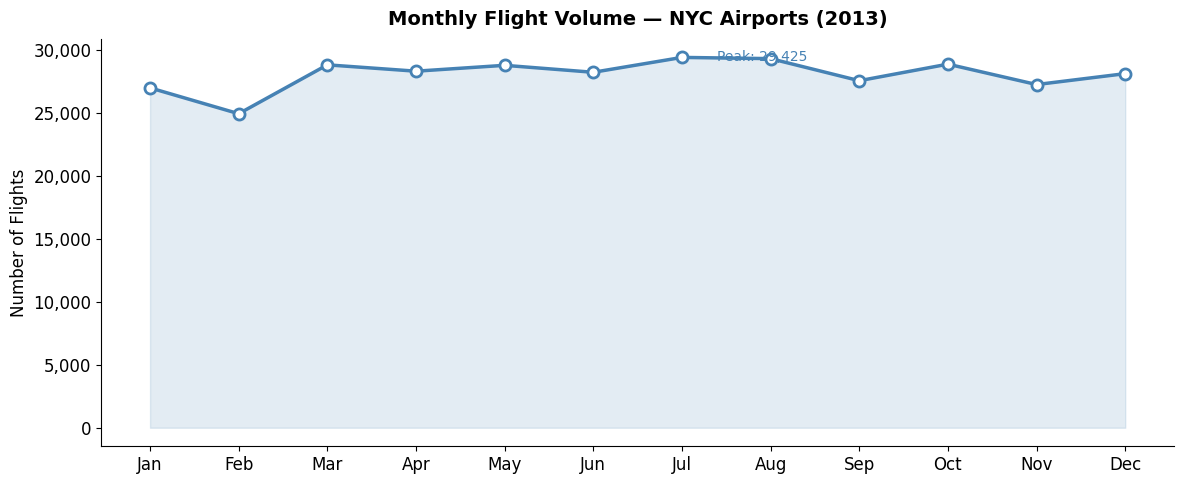

Chart 2 saved.


In [4]:
month_counts = df.groupby('month').size()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(month_names, month_counts.values, marker='o', linewidth=2.5,
        color='steelblue', markersize=8, markerfacecolor='white', markeredgewidth=2)
ax.fill_between(range(12), month_counts.values, alpha=0.15, color='steelblue')
ax.set_xticks(range(12))
ax.set_xticklabels(month_names)
ax.set_ylabel('Number of Flights')
ax.set_title('Monthly Flight Volume — NYC Airports (2013)', fontsize=14, fontweight='bold', pad=10)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Annotate min and max
max_idx = month_counts.values.argmax()
min_idx = month_counts.values.argmin()
ax.annotate(f'Peak: {month_counts.values[max_idx]:,}',
            xy=(max_idx, month_counts.values[max_idx]),
            xytext=(max_idx + 0.4, month_counts.values[max_idx] - 300),
            fontsize=10, color='steelblue')

plt.tight_layout()
plt.savefig('../outputs/figures/chart2_monthly_flights.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 2 saved.')

---
## Chart 3: Flights Per Day of Week

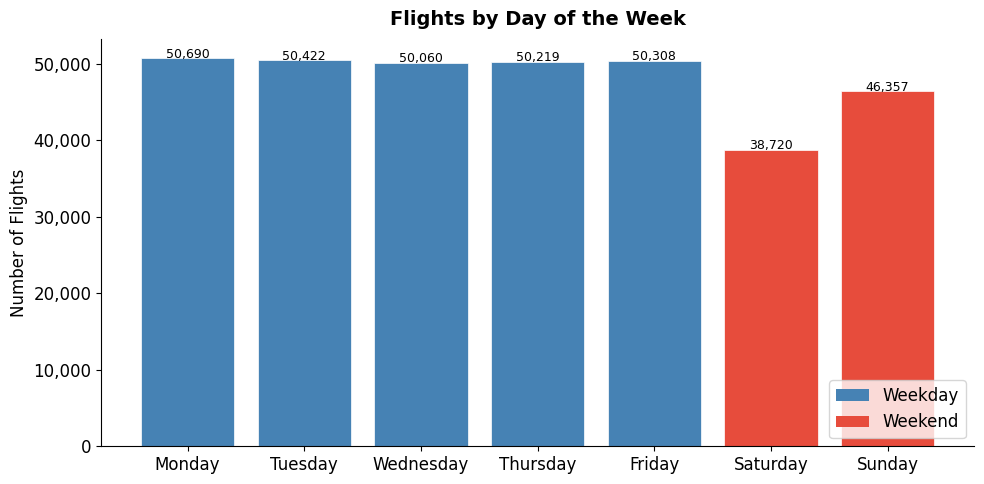

Chart 3 saved.


In [5]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_counts = df.groupby('day_name').size().reindex(day_order)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#e74c3c' if d in ['Saturday','Sunday'] else 'steelblue' for d in day_order]
bars = ax.bar(day_order, day_counts.values, color=colors, edgecolor='white', linewidth=0.5)

ax.set_ylabel('Number of Flights')
ax.set_title('Flights by Day of the Week', fontsize=14, fontweight='bold', pad=10)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for bar, val in zip(bars, day_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
            f'{val:,}', ha='center', fontsize=9)

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', label='Weekday'),
                   Patch(facecolor='#e74c3c', label='Weekend')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../outputs/figures/chart3_flights_by_weekday.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 3 saved.')

---
## Chart 4: Flight Distribution by Departure Hour

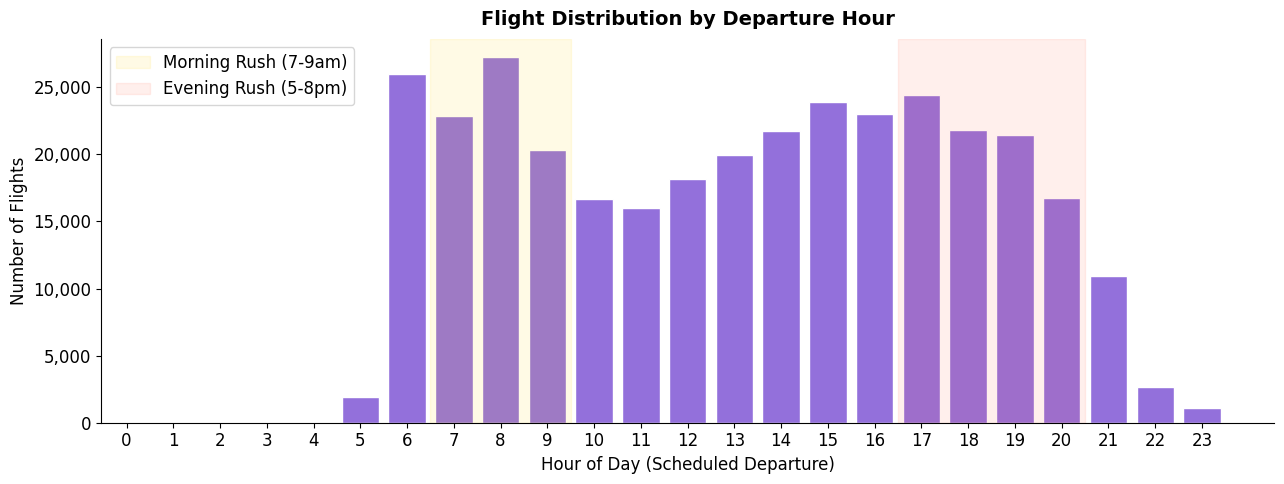

Chart 4 saved.


In [6]:
hour_counts = df.groupby('hour').size()

fig, ax = plt.subplots(figsize=(13, 5))
ax.bar(hour_counts.index, hour_counts.values, color='mediumpurple', edgecolor='white')
ax.set_xlabel('Hour of Day (Scheduled Departure)')
ax.set_ylabel('Number of Flights')
ax.set_title('Flight Distribution by Departure Hour', fontsize=14, fontweight='bold', pad=10)
ax.set_xticks(range(0, 24))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Shade peak hours
ax.axvspan(6.5, 9.5, alpha=0.1, color='gold', label='Morning Rush (7-9am)')
ax.axvspan(16.5, 20.5, alpha=0.1, color='tomato', label='Evening Rush (5-8pm)')
ax.legend()

plt.tight_layout()
plt.savefig('../outputs/figures/chart4_hourly_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 4 saved.')

---
## Chart 5: Departure Delay Distribution

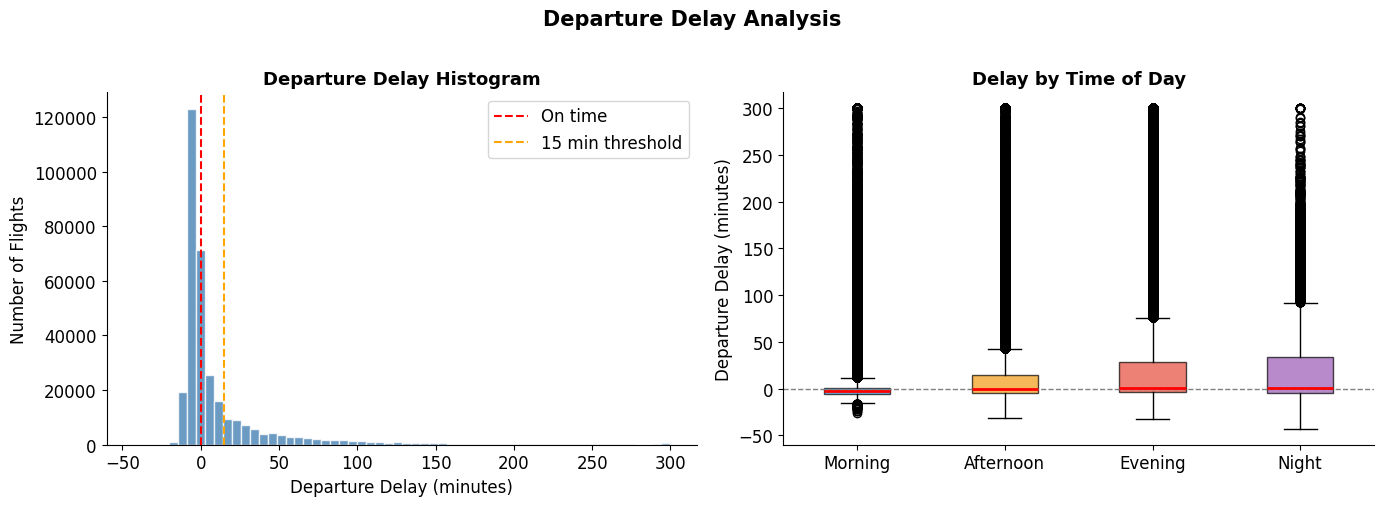

Chart 5 saved.


In [7]:
delays = df_completed['dep_delay'].dropna()
# Clip extreme outliers for viz
delays_clipped = delays.clip(-60, 300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(delays_clipped, bins=60, color='steelblue', edgecolor='white', alpha=0.8)
ax1.axvline(0, color='red', linestyle='--', linewidth=1.5, label='On time')
ax1.axvline(15, color='orange', linestyle='--', linewidth=1.5, label='15 min threshold')
ax1.set_xlabel('Departure Delay (minutes)')
ax1.set_ylabel('Number of Flights')
ax1.set_title('Departure Delay Histogram', fontsize=13, fontweight='bold')
ax1.legend()

# Boxplot by time-of-day
period_order = ['Morning', 'Afternoon', 'Evening', 'Night']
box_data = [df_completed[df_completed['dep_hour_bin'] == p]['dep_delay'].dropna().clip(-60, 300)
            for p in period_order]
bp = ax2.boxplot(box_data, labels=period_order, patch_artist=True,
                 medianprops=dict(color='red', linewidth=2))
colors_box = ['#3498db', '#f39c12', '#e74c3c', '#9b59b6']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_ylabel('Departure Delay (minutes)')
ax2.set_title('Delay by Time of Day', fontsize=13, fontweight='bold')

plt.suptitle('Departure Delay Analysis', fontsize=15, fontweight='bold', y=1.01)
plt.tight_layout()
plt.savefig('../outputs/figures/chart5_delay_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 5 saved.')

---
## Chart 6: Top 10 Busiest Routes

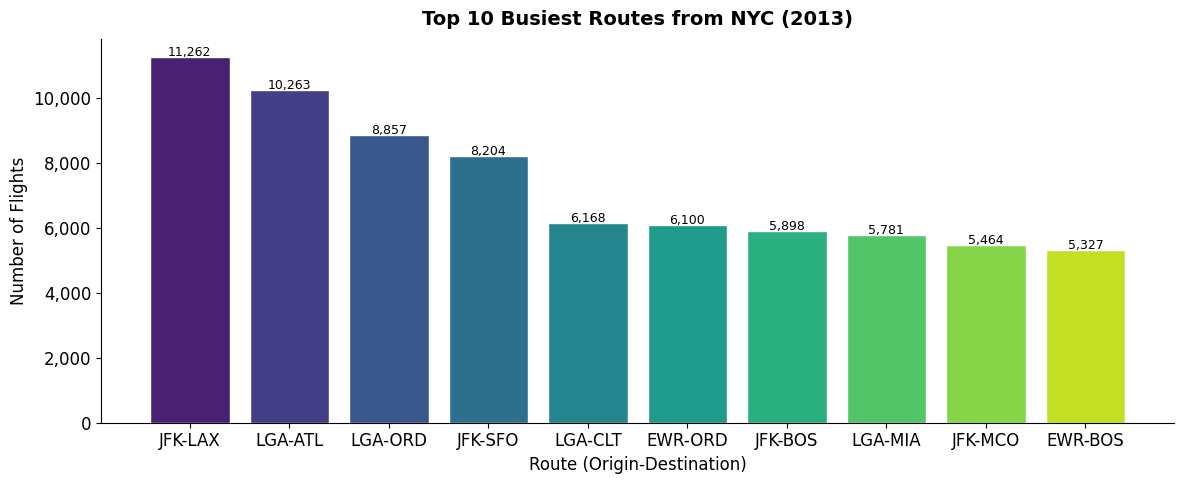

Chart 6 saved.


In [8]:
top_routes = df.groupby('route').size().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 5))
bars = ax.bar(top_routes.index, top_routes.values,
              color=sns.color_palette('viridis', 10), edgecolor='white')
ax.set_xlabel('Route (Origin-Destination)')
ax.set_ylabel('Number of Flights')
ax.set_title('Top 10 Busiest Routes from NYC (2013)', fontsize=14, fontweight='bold', pad=10)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for bar, val in zip(bars, top_routes.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30,
            f'{val:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/figures/chart6_busiest_routes.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 6 saved.')

---
## Chart 7: Average Departure Delay by Carrier

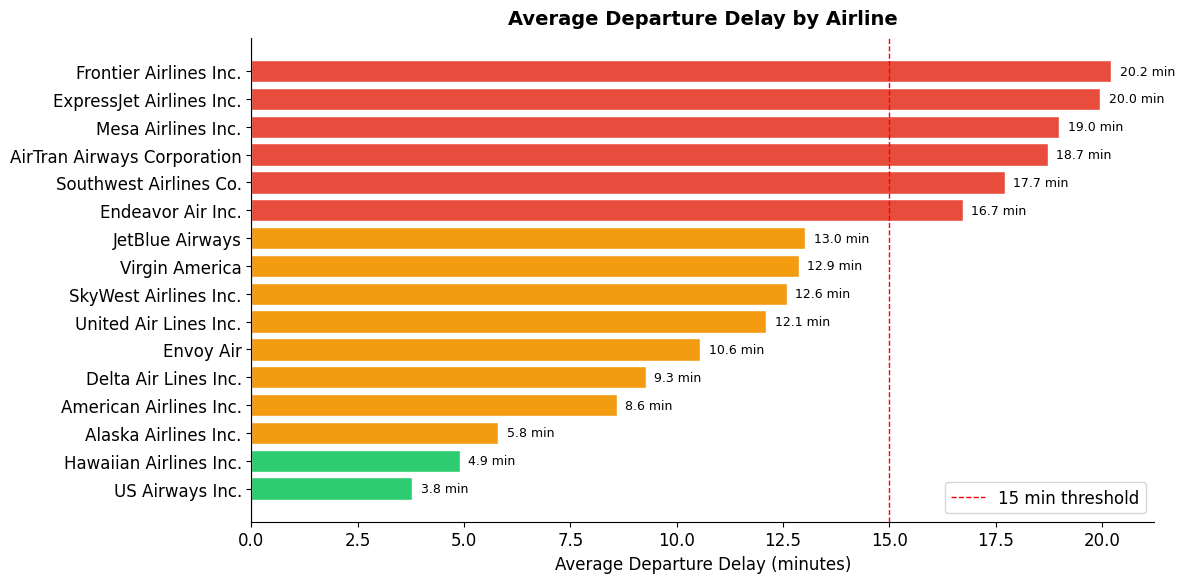

Chart 7 saved.


In [9]:
carrier_delay = (df_completed.groupby('name')['dep_delay']
                  .mean()
                  .sort_values(ascending=True))

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#e74c3c' if v > 15 else '#f39c12' if v > 5 else '#2ecc71'
          for v in carrier_delay.values]
bars = ax.barh(carrier_delay.index, carrier_delay.values, color=colors, edgecolor='white')
ax.axvline(0, color='black', linewidth=0.8)
ax.axvline(15, color='red', linewidth=1, linestyle='--', label='15 min threshold')
ax.set_xlabel('Average Departure Delay (minutes)')
ax.set_title('Average Departure Delay by Airline', fontsize=14, fontweight='bold', pad=10)
ax.legend()

for bar, val in zip(bars, carrier_delay.values):
    ax.text(val + 0.2, bar.get_y() + bar.get_height()/2,
            f'{val:.1f} min', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/figures/chart7_carrier_delays.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 7 saved.')

---
## Chart 8: Origin Airport Comparison

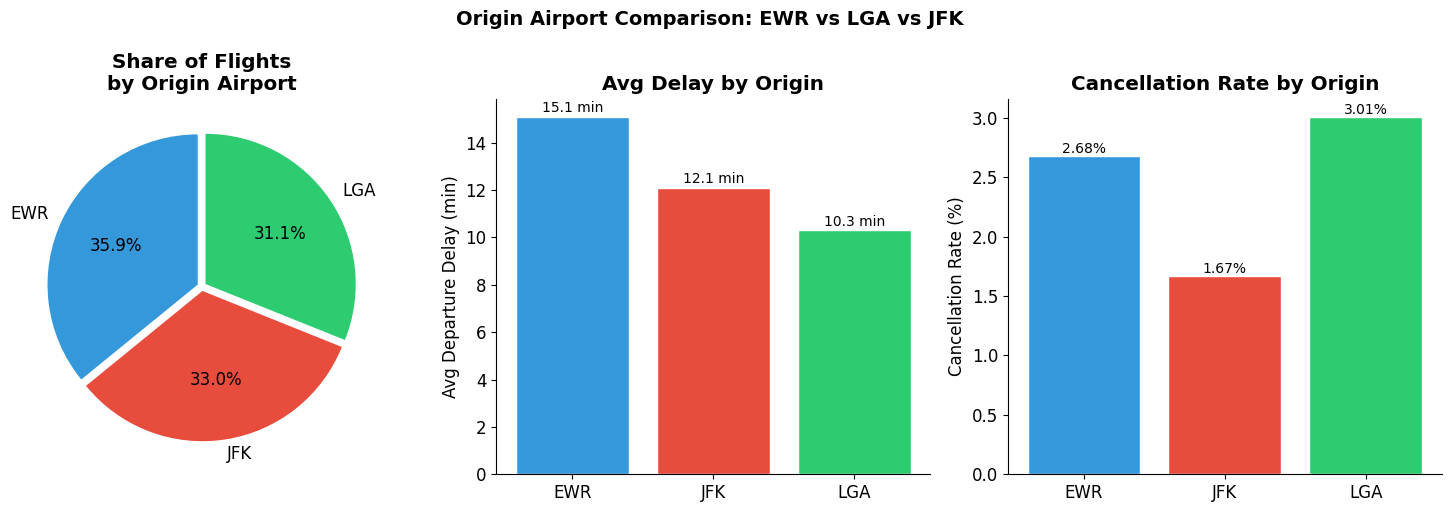

Chart 8 saved.


In [10]:
origin_flights = df.groupby('origin').size()
origin_delays = df_completed.groupby('origin')['dep_delay'].mean().round(1)
origin_cancel = df.groupby('origin')['is_cancelled'].mean().mul(100).round(2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Total flights
explode = [0.03, 0.03, 0.03]
ax1.pie(origin_flights.values, labels=origin_flights.index,
        autopct='%1.1f%%', startangle=90, explode=explode,
        colors=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_title('Share of Flights\nby Origin Airport', fontweight='bold')

# Avg delay
colors3 = ['#3498db', '#e74c3c', '#2ecc71']
bars2 = ax2.bar(origin_delays.index, origin_delays.values, color=colors3, edgecolor='white')
ax2.set_ylabel('Avg Departure Delay (min)')
ax2.set_title('Avg Delay by Origin', fontweight='bold')
for bar, val in zip(bars2, origin_delays.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2,
             f'{val} min', ha='center', fontsize=10)

# Cancellation rate
bars3 = ax3.bar(origin_cancel.index, origin_cancel.values, color=colors3, edgecolor='white')
ax3.set_ylabel('Cancellation Rate (%)')
ax3.set_title('Cancellation Rate by Origin', fontweight='bold')
for bar, val in zip(bars3, origin_cancel.values):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val}%', ha='center', fontsize=10)

plt.suptitle('Origin Airport Comparison: EWR vs LGA vs JFK',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/chart8_origin_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 8 saved.')

---
## Chart 9: Distance vs Air Time (Speed Relationship)

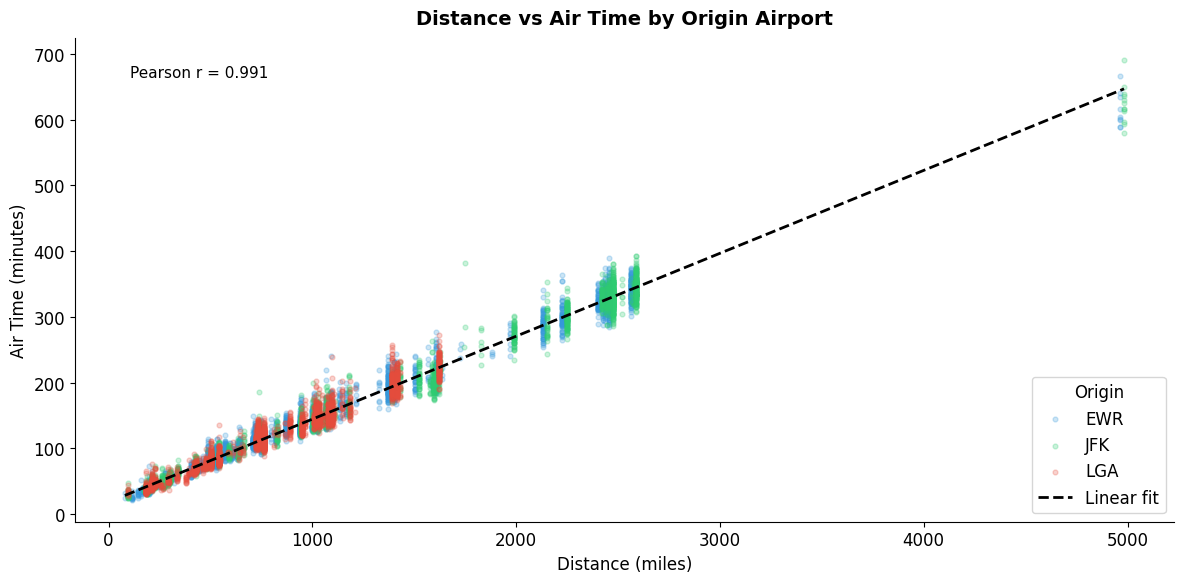

Chart 9 saved.


In [11]:
# Sample for readability
sample = df_completed[['distance', 'air_time', 'origin']].dropna().sample(8000, random_state=42)

fig, ax = plt.subplots(figsize=(12, 6))
colors_origin = {'EWR': '#3498db', 'LGA': '#e74c3c', 'JFK': '#2ecc71'}

for origin, group in sample.groupby('origin'):
    ax.scatter(group['distance'], group['air_time'],
               alpha=0.25, s=12, color=colors_origin[origin], label=origin)

# Regression line on all data
# Drop NaNs jointly so x_all and y_all have the same length
xy_all = df_completed[['distance', 'air_time']].dropna()
x_all = xy_all['distance']
y_all = xy_all['air_time']
m = np.polyfit(x_all, y_all, 1)
x_line = np.linspace(x_all.min(), x_all.max(), 100)
ax.plot(x_line, np.polyval(m, x_line), 'k--', linewidth=2, label='Linear fit')

ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Air Time (minutes)')
ax.set_title('Distance vs Air Time by Origin Airport', fontsize=14, fontweight='bold', pad=10)
ax.legend(title='Origin')

corr = df_completed[['distance','air_time']].dropna().corr().iloc[0,1]
ax.text(0.05, 0.92, f'Pearson r = {corr:.3f}', transform=ax.transAxes, fontsize=11)

plt.tight_layout()
plt.savefig('../outputs/figures/chart9_distance_vs_airtime.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 9 saved.')

---
## Chart 10: Cancellation Rate by Carrier

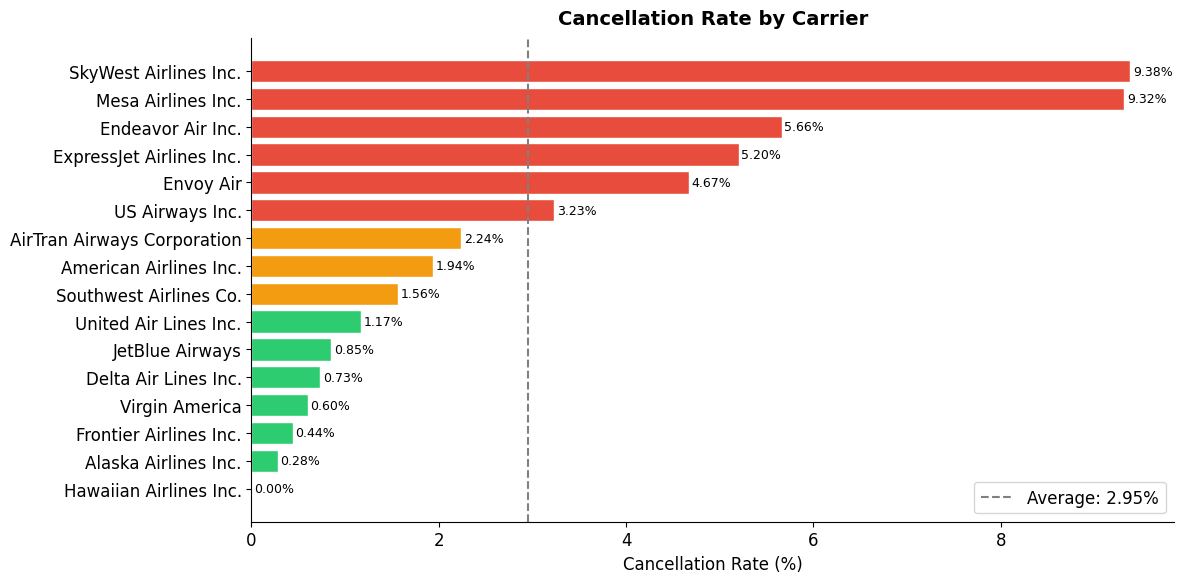

Chart 10 saved.


In [12]:
cancel_rate = (df.groupby('name')['is_cancelled']
               .mean()
               .mul(100)
               .round(2)
               .sort_values(ascending=True))

fig, ax = plt.subplots(figsize=(12, 6))
colors_bar = ['#e74c3c' if v > 3 else '#f39c12' if v > 1.5 else '#2ecc71'
              for v in cancel_rate.values]
bars = ax.barh(cancel_rate.index, cancel_rate.values, color=colors_bar, edgecolor='white')
ax.axvline(cancel_rate.mean(), color='gray', linestyle='--', linewidth=1.5,
           label=f'Average: {cancel_rate.mean():.2f}%')
ax.set_xlabel('Cancellation Rate (%)')
ax.set_title('Cancellation Rate by Carrier', fontsize=14, fontweight='bold', pad=10)
ax.legend()

for bar, val in zip(bars, cancel_rate.values):
    ax.text(bar.get_width() + 0.03, bar.get_y() + bar.get_height()/2,
            f'{val:.2f}%', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/figures/chart10_cancellation_rate.png', dpi=150, bbox_inches='tight')
plt.show()
print('Chart 10 saved.')

---
## Week 3 Summary

| Chart | Type | Key Insight |
|-------|------|-------------|
| 1 — Top Airlines | Horizontal bar | UA, B6, EV are the busiest |
| 2 — Monthly Trend | Line | Summer peak (Jul/Aug), Feb dip |
| 3 — Day of Week | Bar | Weekdays busier than weekends |
| 4 — Hourly Distribution | Bar | Rush at 8am and 6pm |
| 5 — Delay Distribution | Histogram + Boxplot | Right-skewed; evening flights worse |
| 6 — Busiest Routes | Bar | EWR-ORD, LGA-ATL dominate |
| 7 — Carrier Delay | Horizontal bar | Some carriers far above 15-min threshold |
| 8 — Origin Comparison | Pie + Bar | EWR handles most flights |
| 9 — Distance vs Air Time | Scatter | Near-perfect linear relationship (r ≈ 0.99) |
| 10 — Cancellation Rate | Horizontal bar | Wide variation across carriers |

**All charts saved to** `outputs/figures/`
